In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

#<font size="20+"> <font color="blue"> **Violin plot**</font>

**¿Qué es un Violin plot?**

Un gráfico de violin mezcla dos tipos de gráficos: los boxplots y los gráficos de densidad.

**¿Por qué deberiamos utilizar un gráfico de violin?**

Anteriormente, aprendimos que los boxplot son gráficos sencillos y convenientes para comparar varios grupos en un mismo gráfico, en términos de sus cuantiles. Sin embargo, estos gráficos no nos permiten ver facilmente comportamientos como la bimodalidad o la multimodalidad. 

Por otro lado, los gráficos de densidad nos permiten observar propiedades distribucionales de los datos, pero no son muy convenientes para comparar muchos grupos a la vez.

Los gráficos de violín son un híbrido entre un gráfico de boxplot y uno de densidad, que nos permiten quedarnos con lo mejor de ambos gráficos.



# **Gráficos de violin** 
Generamos datos simulados de una distribución exponencial

In [ ]:
#Generamos datos de una distribución exponencial
np.random.seed(1)
df=pd.DataFrame(np.random.exponential(0.3,100),columns=["Datos"])
df.describe() #claramente notamos asimetria en estos datos (compare la mediana con el valor máximo)

,Datos
count,100.000000
mean,0.284472
std,0.274850
min,0.000034
25%,0.070656
50%,0.191117
75%,0.383775
max,1.349193


Obtenemos un gráfico de densidad para nuestros datos

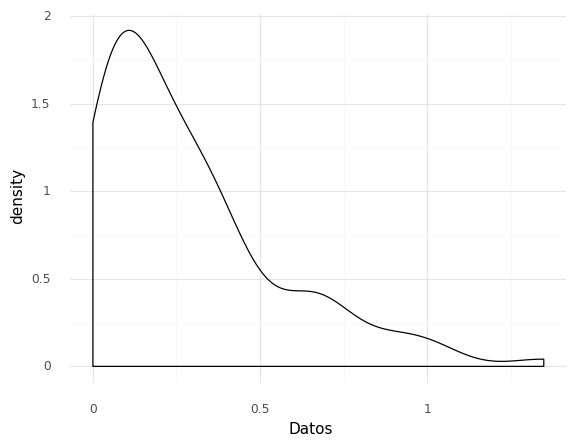

<ggplot: (8763499803061)>

In [ ]:
(ggplot(df)+
 geom_density(aes(x="Datos"))+
 theme_minimal()
 )



y su correspondiente Boxplot

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


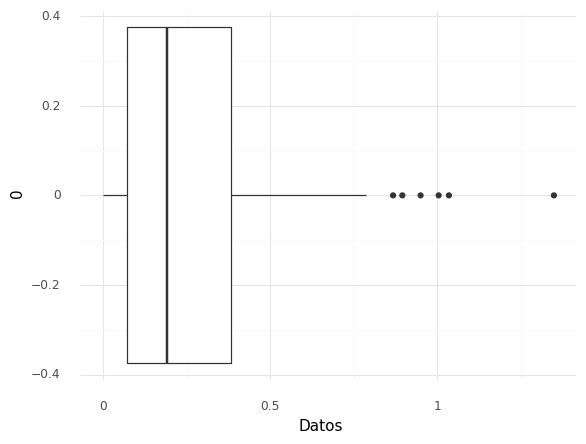

<ggplot: (8763497840869)>

In [ ]:
(ggplot(df)+
 geom_boxplot(aes(y="Datos",x=0))+
 coord_flip()+
 theme_minimal()
)

##<font color="teal">**Nuestro primer gráfico de violin**</font> 
Un gráfico de violín es la combinación de ámbos gráficos. La versión básica de un gráfico de violin se genera usando el siguiente código:

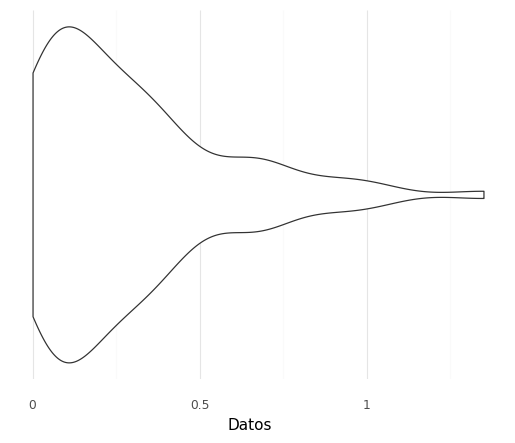

<ggplot: (8763499506601)>

In [ ]:
(ggplot(df)+
 aes(y="Datos")+
 geom_violin(aes(x=0))+
 scale_x_continuous(breaks=None)+
 theme_minimal()+
 xlab("")+
 coord_flip()
)

Para una versión más informativa del gráfico de violín, superponemos un histograma. Para lograr que el histograma sea de un ancho más pequeño usamos el argumento **width=0.1**.

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


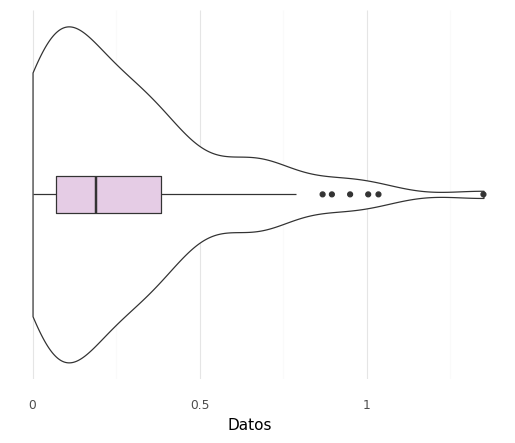

<ggplot: (8763497876413)>

In [ ]:
(ggplot(df)+
 aes(y="Datos")+
 geom_violin(aes(x=0))+
 geom_boxplot(aes(x=0),width=0.1, fill="purple", alpha=0.2) +
 scale_x_continuous(breaks=None)+
 theme_minimal()+
 xlab("")+
 coord_flip()
)

##<font color="teal">**Explicación del gráfico de violin**</font> 
* Un gráfico de violín combinado con un boxplot mantiene todas las explicaciones de un boxplot.
* Las partes **más anchas** del gráfico de violín se refieren a zonas de alta probabilidad, es decir, donde hay una mayor frecuencia de datos.
* Las zonas **angostas** son zonas de baja probabilidad, donde vemos una menor frecuencia de datos.

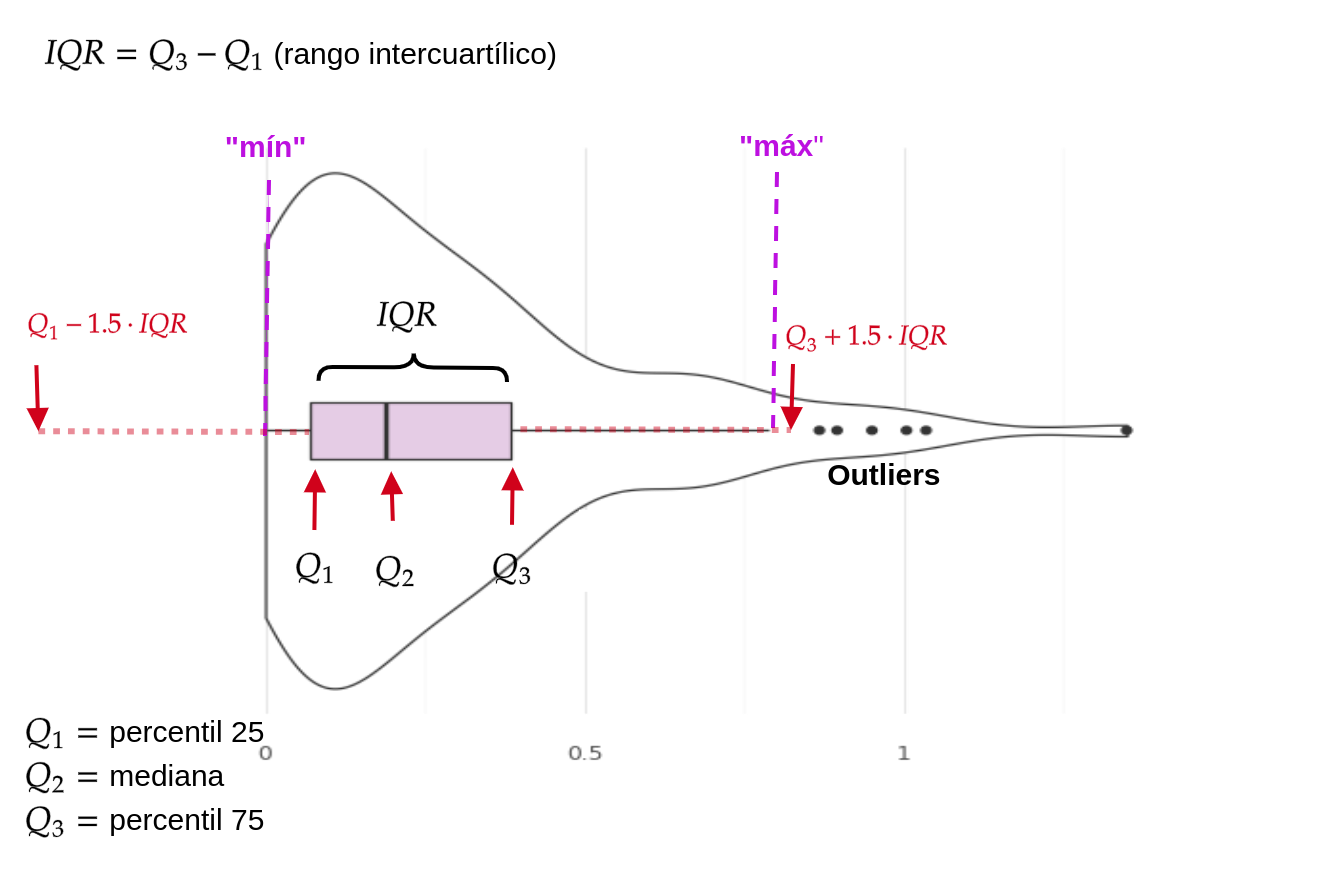

### **Los gráficos de violin nos permiter observar propiedades distribucionales como la Bimodalidad**

In [ ]:
#Creamos datos de una mezcla de normales
np.random.seed(1)
n1=100
n2=150

d1=np.random.normal(-1,0.5,n1)
d2=np.random.normal(6,1,n2)


tipo=["T1"]*(n1+n2)
valor=np.concatenate((d1,d2))

D={"Valor":valor,"Tipo":tipo}
df=pd.DataFrame(D)
df.head()

,Valor,Tipo
0,-0.187827,T1
1,-1.305878,T1
2,-1.264086,T1
3,-1.536484,T1
4,-0.567296,T1


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


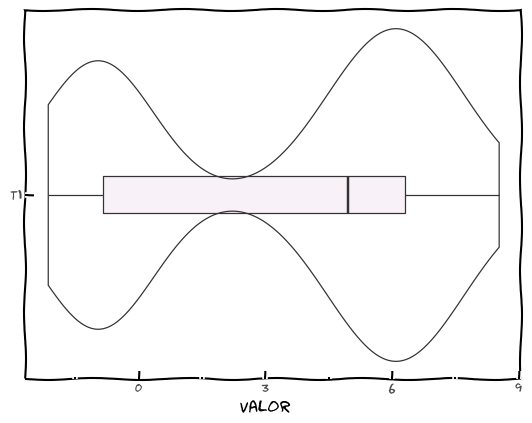

<ggplot: (8763499531533)>

In [ ]:
#El gráfico de violin nos permite fácilmente ver la bimodalidad en los datos
(ggplot(df)+
 aes(x="Tipo",y="Valor")+
 geom_violin()+
 geom_boxplot(width=0.1,fill="purple",alpha=0.05)+
 coord_flip()+
 theme_xkcd()+
 xlab("")
)

Si queremos un gráfico con aún más información sobre los datos, podemos usar el comando **geom_sina()** para superponer las observaciones dentro del gráfico de violín. 

* Cuando usamos el comando sina la distribución de los puntos en el eje y (en este caso) es solo estética y no tiene significado.
* La distribución en el eje x (en este caso) nos muestra la dispersión de los datos, que se observa claramente del violin plot.
* Recuerde que menos es más.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


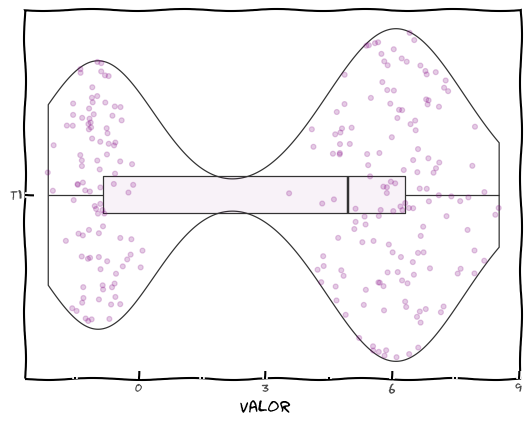

<ggplot: (8763499531577)>

In [ ]:
(ggplot(df)+
 aes(x="Tipo",y="Valor")+
 geom_violin()+
 geom_boxplot(width=0.1,fill="purple",alpha=0.05)+
 geom_sina(color="purple",alpha=0.2)+
  coord_flip()+
 theme_xkcd()+
 xlab("")
)

##<font color="teal">**Gráficos de violin para 2 o más categorias**</font> 

Al igual que los boxplot, los gráficos de vilín nos permiten comparar fácilmente verios grupos a la vez:

In [ ]:
#Creamos datos para tres grupos considerando tamaños y distribuciones diferentes
np.random.seed(1)
n1=100
n2=50
n3=90

d1=np.random.exponential(0.3,n1)
d2=np.random.normal(2,0.5,n2)
d3=np.random.gamma(1,0.7,n3)

tipo=["T1"]*n1+["T2"]*n2+["T3"]*n3
valor=np.concatenate((d1,d2,d3))

D={"Valor":valor,"Tipo":tipo}
df=pd.DataFrame(D)
df.head()

,Valor,Tipo
0,0.161882,T1
1,0.382238,T1
2,0.000034,T1
3,0.108004,T1
4,0.047613,T1


Procedemos a graficar un gráfico de violín por categoria. Note que usando la información otorgada por estos gráficos podemos darnos cuentas de propiedades distribucionales de cada grupo. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


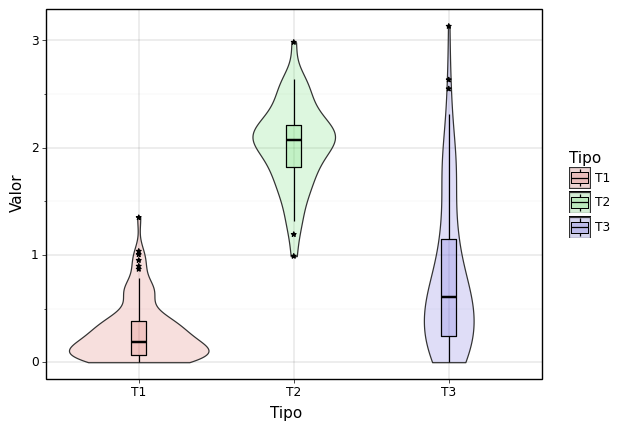

<ggplot: (8763499692345)>

In [ ]:
(ggplot(df)+
aes(x="Tipo",y="Valor",fill="Tipo")+
geom_violin(alpha=0.2)+  
geom_boxplot(width=0.1,color="black",alpha=0.2,outlier_shape="*") +
theme_linedraw()
)

### **geom_sina()**

Este comando nos permite superponer las observaciones dentro del gráfico de violín.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


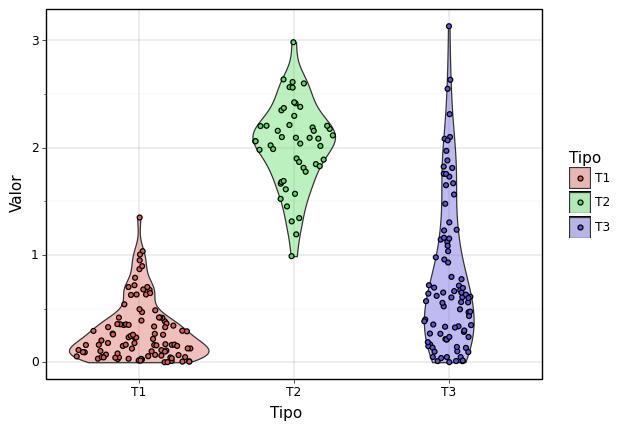

<ggplot: (8763497858633)>

In [ ]:
(ggplot(df)+
aes(x="Tipo",y="Valor",fill="Tipo")+
geom_violin(alpha=0.4)+  
geom_sina()+
#geom_jitter(alpha=0.2,width=0.05)+
theme_linedraw()
)

### **geom_jitter()**

Este comando es similar al anterior, pero el ancho del rango donde se grafican los puntos es fijo.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


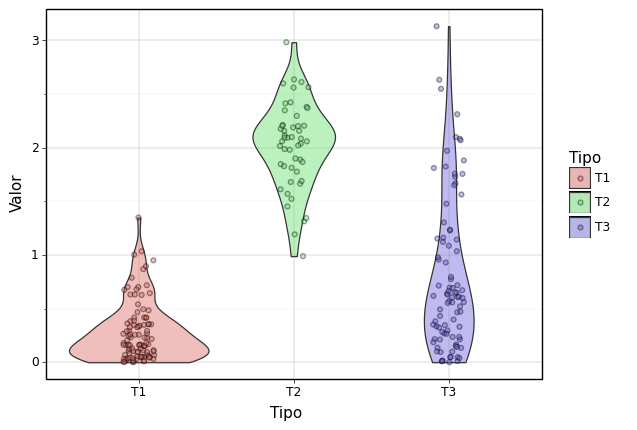

<ggplot: (8763508831281)>

In [ ]:
(ggplot(df)+
aes(x="Tipo",y="Valor",fill="Tipo")+
geom_violin(alpha=0.4)+  
geom_jitter(alpha=0.4,width=0.1)+
theme_linedraw()
)